In [1]:
try:
  import numpy as np
  import matplotlib.pyplot as plt
  import cv2
except:
  !pip install numpy
  !pip install matplotlib
  !pip install opencv-python
  import numpy as np
  import matplotlib.pyplot as plt
  import cv2

In [2]:
file_names=[f'{i}.jpg' for i in range(1,6)]

In [3]:
def generate1DSignal(img):
  ## Remove noise from the image with median filter/kernel of size 5x5.
  img = cv2.medianBlur(img, 5)
  signal1d=[]
  #For each column in the image find the mean of row indices of the black pixel values
  # and store in signal2d
  # When you will plot signal1d using matplotlib, you will get a plot similar to the signal
  #present in the image.
  for i in range(img.shape[1]):
    indices=[]
    for j in range(img.shape[0]):
      if(img[j][i]<20):
        indices.append(j)
    try:
      signal1d.append(sum(indices)/len(indices))
    except:
      pass
  signal1d=img.shape[0]-np.array(signal1d)
  # print(signal1d)
  return signal1d

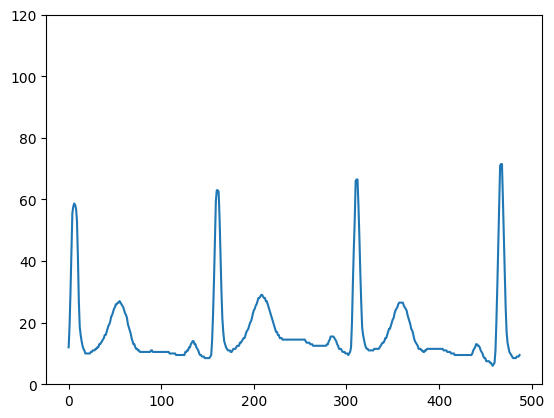

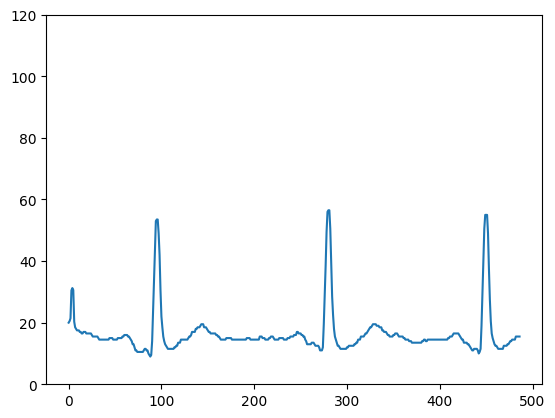

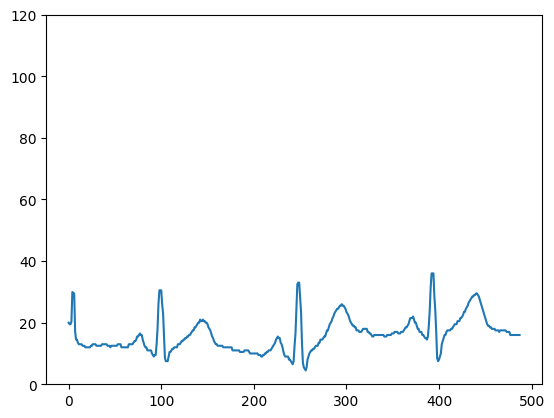

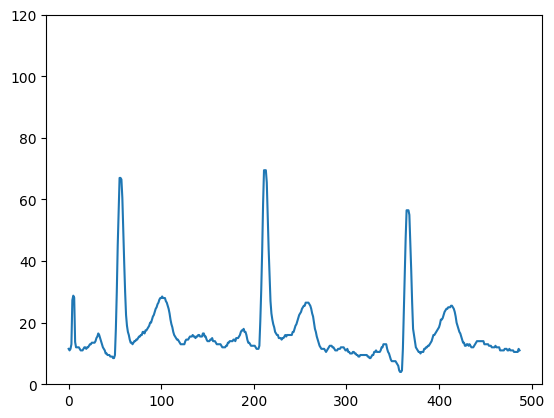

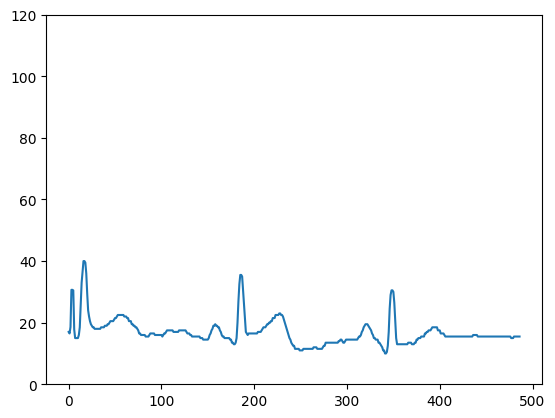

In [4]:
for file in file_names:
  img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
  generated_signal=generate1DSignal(img)
  np.save(f"signal"+file[0],generated_signal)
  plt.plot(generated_signal)
  plt.ylim([0,120])
  plt.savefig("generated_signal"+file[0])
  plt.show()

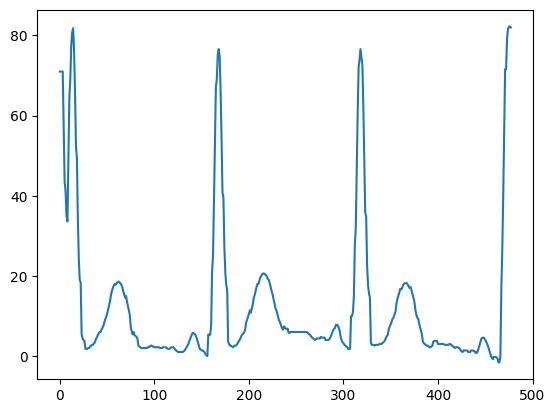

In [5]:
signal=np.load("signal.npy")
plt.plot(signal)